# COGS 108 - Final Project 

# Overview of Money + ? = Obesity 

We are dealing with 3 datasets which are obesity, income, healthcare expense. Since we have to compare obesity vs. income and obesity vs. healthcare, there will be two different data cleaning,  data visualization sections that corresponds to the comparison.

# Names

- Min Liu
- Yoo Jin Chung
- Qin Li
- Cesar Reyes
- Phi Nguyen

## Group Members IDs

- A92061065
- A14692760
- A13803098
- A14078314
- A14145338

# Research Question

##### 1. Can we find a correlative relationship between money and obesity?
##### 2. If so, how could money influence obesity? Is it through household income/medical expense?




## Background and Prior Work

The obesity epidemic continues to be a prevalent health issue in the US as the rate of obesity climbs every year. While there are substantial efforts being made towards treating this issue, there is still unclear evidence of its success since it still affects 34% of adults [1].

Obesity is now considered a chronic disease by the National Institute of Health, American Medical Association and many other medical diseases. With this in mind, it is necessary to inquire about the causes of this epidemic in order to better address effective methods towards reducing obesity rates. 

One article about obesity and health expenses piqued our interest in examining economic relationships that may provide insight into the epidemic. According to Estimated Economic Costs of Obesity to U.S. Business [2], “the health cost of obesity to U.S business represents 5% of total medical care costs”. 

Another study from 2011 to 2014 showed a correlation between obesity and income in women but no differences between obesity and income among men [3]. Inspired by these results, we were wondering whether there is a correlation between income and obesity among different regions in the US and examine the costs of health expenditures by state and analyze its relationship to each states obesity rate. 

References (include links):
- [1] Nia, M. et al. (2012) OBESITY: OVERVIEW OF AN EPIDEMIC. Psychiatr Clin North; 34(4): 717–732. doi: 10.1016/j.psc.2011.08.005 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3228640/
- [2] Thompson, D. (1998) Estimated Economic Costs of Obesity to U.S. Business https://journals.sagepub.com/doi/abs/10.4278/0890-1171-13.2.120
- [3] Cynthia, L. et al. (2017) Prevalence of Obesity Among Adults, by Household Income and Education — United States, 2011–2014. Morbidity and Mortality Weekly Report; 66(50);1369–1373. https://www.cdc.gov/mmwr/volumes/66/wr/mm6650a1.htm#T1_down


# Hypothesis


We hypothesize that higher annual income, higher education expenses, and higher medical care expenses will relate to lower obesity rate since theoretically each of them help people to maintain a better lifestyle.

Ideally, we should also be able to see the evolution of each element here along time and region according to the data we collected below.


# Dataset(s)

**Adult Obesity in the United States**
- Data: https://www.stateofobesity.org/adult-obesity/
- 900 observations
- This dataset provides the average rate of adult obesity within 48 states in the US from 1990-2017. It was obtained by  https://www.stateofobesity.org/adult-obesity/, as part of a project initiated by the Trust for America’s Health and the Robert Wood Foundation to raise awareness of the obesity epidemic. Variables include the states observed, the adult obesity rate of that state, and the year observed. 


**Health expenditure per capita (1991 - 2014 with 49 states)**
- Visual: https://www.kff.org/other/state-indicator/health-spending-per-capita/?activeTab=map&currentTimeframe=0&selectedDistributions=health-spending-per-capita&selectedRows=%7B%22states%22:%7B%22all%22:%7B%7D%7D,%22wrapups%22:%7B%22united-states%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
- Data: https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NationalHealthAccountsStateHealthAccountsResidence.html
- 1,200 observations
- Another one of our datasets presents Health Care Expenditures per Capita by State of Residence in a similar fashion, with the healthcare expenditure amount per capita of 50 states from 1991-2014. The data was obtained by the Center for Medicare and Medicaid Services and its variables include the states and years observed, as well as the health spending per capita. Similar data is provided from the dataset from the Henry J Kaiser Family Foundation.


**Median Household Income by State: 1984 to 2017 from Census Bureau**
- Data: http://factfinder.census.gov/bkmk/table/1.0/en/ACS/11_1YR/R1901.US01PRF
- Data (spreadsheet): https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-income-households/h08.xls
- 1650 observations
- Our last dataset provides the median household income by state from 1984-2017 from the Census Bureau. The variables include the state and year observed, medium and medium income with 1650 observations in the data set. The same type of data is also provided by the American Fact Finder.


# Setup

In [1]:
## YOUR CODE HERE
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns


# Data Cleaning

### Load Data and Trim

The data of household income, obesity rate and healthcare cost at each year was loaded here.
We merged the three data at each year and named it as data_year according to 'state'. Also, we add up all years of data to a df table in order to have a general look into it.

In [2]:
##
## The codes to load the original data sets, After the operation here, the reading values will be numerical 
##
income_summary = pd.read_csv("./household_income/Summary_2017_1984.csv", thousands=',')
income_summary = income_summary.rename(index=str, columns={'State': 'state'})
obesity_summary = pd.read_csv("./obesity_rate.csv")
obesity_summary = obesity_summary.rename(index=str, columns={'States': 'state'})
del obesity_summary['Unnamed: 0']
health_summary = pd.read_csv("./healthcare/healthcare_in_one.csv")


In [3]:
## Merge Data
years = np.array([1995, 2000, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
for i in years:
    exec("data_"+str(i)+" = income_summary[['state', '"+str(i)+"']]")
    exec("data_"+str(i)+" = data_"+str(i)+".rename(index=str, columns={'"+str(i)+"':'income'})")
    exec("data_"+str(i)+" = pd.merge(data_"+str(i)+", obesity_summary[['state','"+str(i)+"']], on=('state'))")
    exec("data_"+str(i)+" = data_"+str(i)+".rename(index=str, columns={'"+str(i)+"':'obesity'})")
    exec("data_"+str(i)+" = pd.merge(data_"+str(i)+", health_summary[['state','"+str(i)+"']], on=('state'))")
    exec("data_"+str(i)+" = data_"+str(i)+".rename(index=str, columns={'"+str(i)+"':'health_cost'})")
    exec("data_"+str(i)+"['health/income'] = data_"+str(i)+"['health_cost']/data_"+str(i)+"['income']")
    exec("data_"+str(i)+".dropna()")

for i in years:
    exec("hc"+str(i)+" = health_summary[['state', '"+str(i)+"']]")
    exec("ob"+str(i)+" = obesity_summary[['state', '"+str(i)+"']]")
    exec("ic"+str(i)+" = income_summary[['state', '"+str(i)+"']]")
    exec("temp = pd.merge(hc"+str(i)+", ob"+str(i)+", on = 'state')")
    exec("temp = pd.merge(ic"+str(i)+", temp, on = 'state')")
    exec("temp.rename(columns = {'"+str(i)+"': 'income', '"+str(i)+"_x': 'healthcare', '"+str(i)+"_y': 'obesity'}, inplace = True)")
    if i == 1995:
        df = temp
    else:
        df = df.append(temp, ignore_index = True)

## Check if there are errors in the data

- df.isnull().values.any() 

needs to ouput "False" in order to comfirm that
there are no null values in the dataframe

We can see that data in 2004 has a null point and we removed that null point.

In [5]:
print(df.isnull().values.any())
for i in years:
    print("Year "+str(i))
    #exec("print(data_"+str(i)+".shape)")
    exec("print(data_"+str(i)+".isnull().values.any())")

True
Year 1995
False
Year 2000
False
Year 2003
False
Year 2004
True
Year 2005
False
Year 2006
False
Year 2007
False
Year 2008
False
Year 2009
False
Year 2010
False
Year 2011
False
Year 2012
False
Year 2013
False
Year 2014
False


In [6]:
data_2004 = data_2004.dropna()
df = df.dropna()
print(data_2004.shape)
print(df.shape)
df.income = df.income.astype(float)

(48, 5)
(685, 4)


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [7]:
## To see the description of df
desc = df.describe()
desc


,income,healthcare,obesity
count,685.000000,685.000000,685.000000
mean,48051.379562,6346.643796,0.249622
std,9162.494072,1666.855241,0.050524
min,24880.000000,2334.000000,0.106000
25%,41750.000000,5265.000000,0.217000
50%,47266.000000,6422.000000,0.252000
75%,54091.000000,7461.000000,0.284000
max,76165.000000,11064.000000,0.381000


In [8]:
## To see the correlation of each rows in df
corrs = df.corr()
corrs

,income,healthcare,obesity
income,1.000000,0.625792,0.166479
healthcare,0.625792,1.000000,0.632764
obesity,0.166479,0.632764,1.000000


## Data visualization

We first look into into the data ignoring the year.

Text(0.5, 0, 'obesity rate')

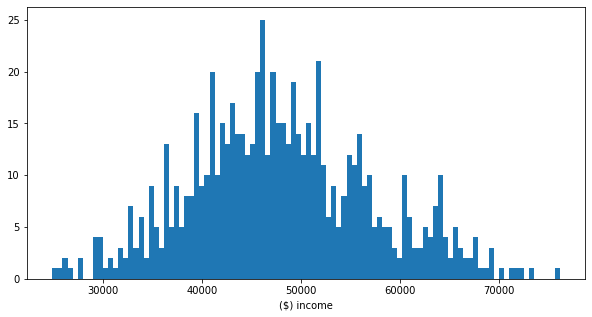

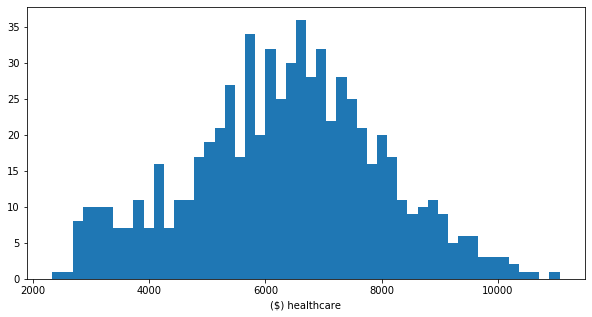

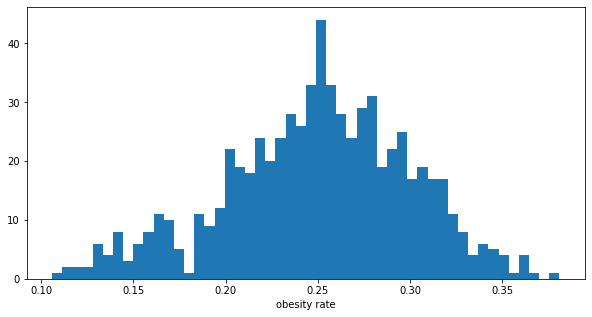

In [8]:
plt.figure(figsize = [10, 5])
plt.hist(df['income'], bins = 100)
plt.xlabel('($) income')

plt.figure(figsize = [10, 5])
plt.hist(df['healthcare'], bins = 50)
plt.xlabel('($) healthcare')

plt.figure(figsize = [10, 5])
plt.hist(df['obesity'], bins = 50)
plt.xlabel('obesity rate')


We plotted obesity vs. income ignoring the yearly difference. And the data points deviate from the linear regression line a lot.

[[9.18010364e-07]]


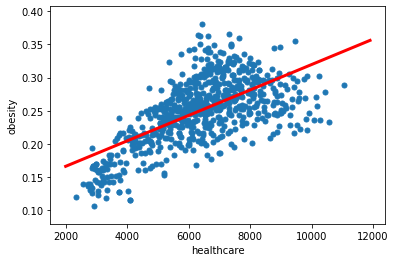

In [9]:
a, b = np.polyfit(df['healthcare'], df['obesity'], 1)
pred = np.add(np.multiply(np.arange(2000, 12000, 100), a), b)

plt.scatter(df['healthcare'], df['obesity'], s = 25)
plt.plot(np.arange(2000, 12000, 100), pred, '-r', linewidth = 3)
plt.xlabel('healthcare')
plt.ylabel('obesity')

result = plt.gcf()
x = pd.DataFrame(df['income'])
y = pd.DataFrame(df['obesity'])

model = LinearRegression()
model.fit(x, y)

print(model.coef_)

We plotted obesity vs. healthcare ignoring the yearly difference. And the data points deviate from the linear regression line a lot, which indicates that the relationship between obesity and healthcare is relatively weak.

[[1.917988e-05]]


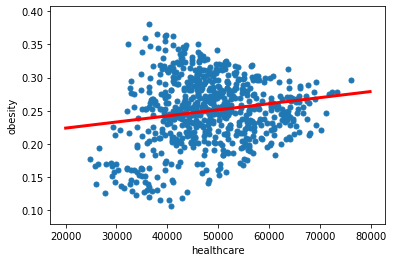

In [10]:
a, b = np.polyfit(df['income'], df['obesity'], 1)
pred = np.add(np.multiply(np.arange(20000, 80000, 100), a), b)

plt.scatter(df['income'], df['obesity'], s = 25)
plt.plot(np.arange(20000, 80000, 100), pred, '-r', linewidth = 3)
plt.xlabel('healthcare')
plt.ylabel('obesity')

result = plt.gcf()

x = pd.DataFrame(df['healthcare'])
y = pd.DataFrame(df['obesity'])

model = LinearRegression()
model.fit(x, y)

print(model.coef_)

We then take the data from single years, 1995, 2000, 2005, 2010. These plot indicates that we should consider the influence of the year since the obesity rate, income, healthcare cost are all increasing as the year increase.


(0.06398026315789473, 0.18608130537438344)

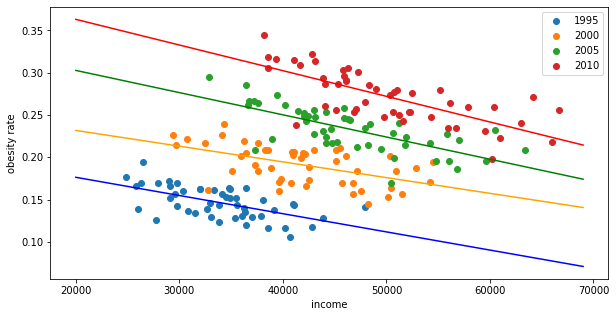

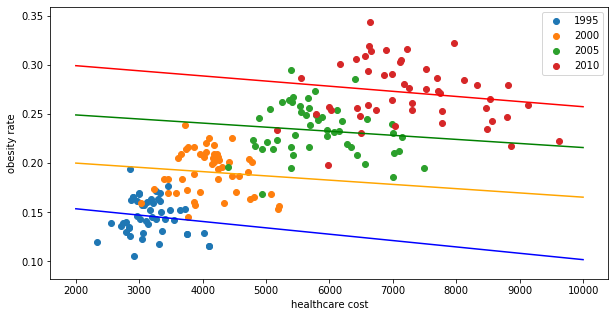

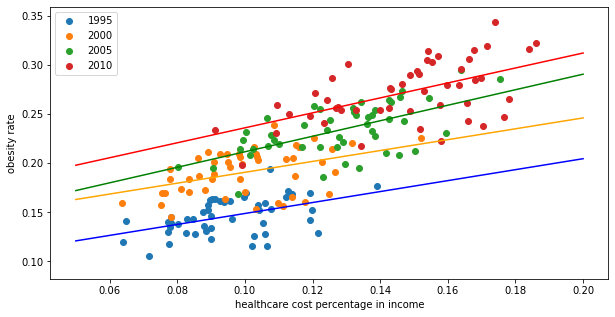

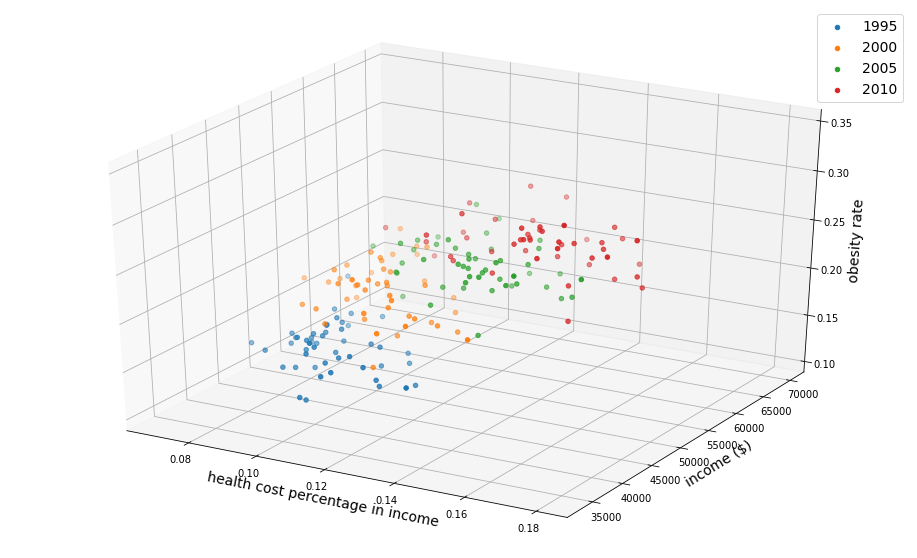

In [11]:
##plot data
plt.figure(figsize = [10, 5])
for i in [1995, 2000, 2005, 2010]:
    exec("plt.scatter(data_"+str(i)+"['income'], data_"+str(i)+"['obesity'], label = '"+str(i)+"')")

##plot fitting
line = np.arange(20000, 70000, 1000)
a, b = np.polyfit(data_1995['income'], data_1995['obesity'], 1)
plt.plot(line, line * a + b, '-b',)
a, b = np.polyfit(data_2000['income'], data_2000['obesity'], 1)
plt.plot(line, line * a + b, '-', color = 'orange')
a, b = np.polyfit(data_2005['income'], data_2005['obesity'], 1)
plt.plot(line, line * a + b, '-g',)
a, b = np.polyfit(data_2010['income'], data_2010['obesity'], 1)
plt.plot(line, line * a + b, '-r',)
plt.legend()
plt.xlabel('income')
plt.ylabel('obesity rate')

plt.figure(figsize = [10, 5])
plt.scatter(data_1995['health_cost'], data_1995['obesity'], label = '1995')
plt.scatter(data_2000['health_cost'], data_2000['obesity'], label = '2000')
plt.scatter(data_2005['health_cost'], data_2005['obesity'], label = '2005')
plt.scatter(data_2010['health_cost'], data_2010['obesity'], label = '2010')

#plot fitting
line = np.arange(2000, 11000, 1000)
a, b = np.polyfit(data_1995['health_cost'], data_1995['obesity'], 1)
plt.plot(line, line * a + b, '-b',)
a, b = np.polyfit(data_2000['health_cost'], data_2000['obesity'], 1)
plt.plot(line, line * a + b, '-', color = 'orange')
a, b = np.polyfit(data_2005['health_cost'], data_2005['obesity'], 1)
plt.plot(line, line * a + b, '-g',)
a, b = np.polyfit(data_2010['health_cost'], data_2010['obesity'], 1)
plt.plot(line, line * a + b, '-r',)
plt.legend()
plt.xlabel('healthcare cost')
plt.ylabel('obesity rate')

plt.figure(figsize = [10, 5])
plt.scatter(data_1995['health/income'], data_1995['obesity'], label = '1995')
plt.scatter(data_2000['health/income'], data_2000['obesity'], label = '2000')
plt.scatter(data_2005['health/income'], data_2005['obesity'], label = '2005')
plt.scatter(data_2010['health/income'], data_2010['obesity'], label = '2010')
#plot fitting
line = np.arange(0.05, 0.20, 0.001)
a, b = np.polyfit(data_1995['health/income'], data_1995['obesity'], 1)
plt.plot(line, line * a + b, '-b',)
a, b = np.polyfit(data_2000['health/income'], data_2000['obesity'], 1)
plt.plot(line, line * a + b, '-', color = 'orange')
a, b = np.polyfit(data_2005['health/income'], data_2005['obesity'], 1)
plt.plot(line, line * a + b, '-g',)
a, b = np.polyfit(data_2010['health/income'], data_2010['obesity'], 1)
plt.plot(line, line * a + b, '-r',)
plt.legend()
plt.xlabel('healthcare cost percentage in income')
plt.ylabel('obesity rate')

fig = plt.figure(figsize= [10*1.618, 10])
ax = plt.axes(projection='3d')
ax.scatter3D((data_1995['health/income']), data_1995['income']*1.02**15, data_1995['obesity'], label = "1995")
ax.scatter3D((data_2000['health/income']), data_2000['income']*1.02**10, data_2000['obesity'], label = "2000")
ax.scatter3D((data_2005['health/income']), data_2005['income']*1.02**5, data_2005['obesity'], label = "2005")
ax.scatter3D((data_2010['health/income']), data_2010['income']*1.02**0, data_2010['obesity'], label = "2010")
ax.set_xlabel('health cost percentage in income ', fontsize = 14)
ax.set_ylabel('income ($)', fontsize = 14)
ax.set_zlabel('obesity rate', fontsize = 14);
ax.legend(fontsize = 14)
ax.set_xlim([min(data_1995['health/income']), max(data_2010['health/income']) ])

We plot the correlation between obesity and the other three elements at each year. 

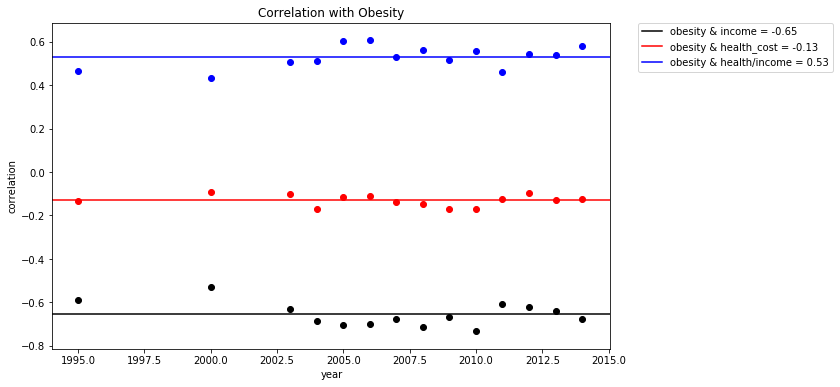

In [12]:
for i in years:
    exec("corr_"+str(i)+" = data_"+str(i)+".corr()")
    #print("the correlation tabel for {}.".format(i))
    #exec("print(corr_"+str(i)+")")
ax = plt.figure(figsize=(10,6))
plt.title('Correlation with Obesity')
tot_year = len(years)
inc_obs = 0
hea_obs = 0
hea_inc_obs = 0
for i in years:
    exec("plt.scatter("+str(i)+", corr_"+str(i)+"['income']['obesity'], color='black')")
    exec("inc_obs += corr_"+str(i)+"['income']['obesity']/tot_year")
    exec("plt.scatter("+str(i)+", corr_"+str(i)+"['health_cost']['obesity'], color='red')")
    exec("hea_obs += corr_"+str(i)+"['health_cost']['obesity']/tot_year")
    exec("plt.scatter("+str(i)+", corr_"+str(i)+"['health/income']['obesity'], color='blue')")
    exec("hea_inc_obs += corr_"+str(i)+"['health/income']['obesity']/tot_year")
plt.axhline(inc_obs, color='black', label = 'obesity & income = {0:.{1}f}'.format(inc_obs, 2))
plt.axhline(hea_obs, color='red', label = 'obesity & health_cost = {0:.{1}f}'.format(hea_obs, 2))
plt.axhline(hea_inc_obs, color = 'blue', label = 'obesity & health/income = {0:.{1}f}'.format(hea_inc_obs, 2))
#plt.scatter(2013, corr_2013['income']['obesity'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('year');
plt.ylabel('correlation');

We did the linear regression modeling here. The percentage of healthcare cost in income, anual income, anual healthcare cost, and the year are considered as the factors contributing to obesity. Then, we compare our model fitting with real obesity rate both for the modeling and prediction.


In the linear regression model to predict obesity rate, the coefficient for each elements:
For the percentage of healthcare cost in income is 1.70
For the income is 0.0000021
For the healthcare cost is -0.000031
For the year is 0.01


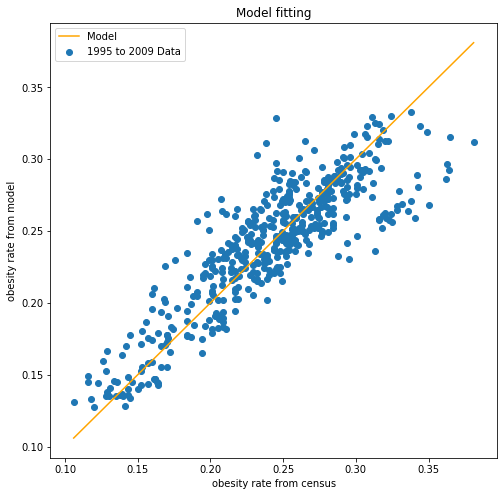

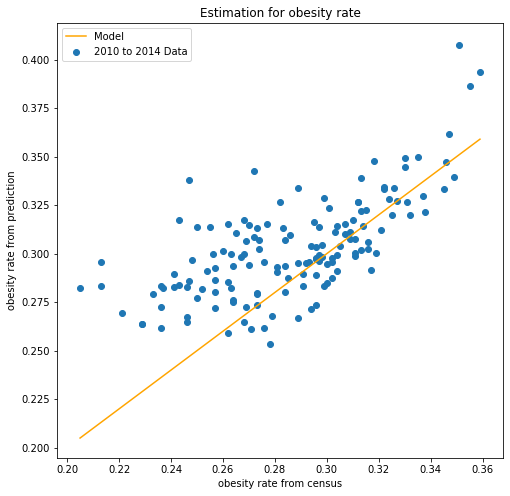

In [13]:
##Fitting the model with the data from 1995 to 2011
for i in years:
    exec("data_"+str(i)+"['year'] = "+str(i))
    exec("a"+str(i)+" = np.array(data_"+str(i)+"[['health/income','income','health_cost', 'year']])");
fit_mat = np.array([a1995, a2000, a2003, a2005, a2006, a2007, a2008, a2009, a2010, a2011]).reshape((49*10, 4))
obs_mat = np.array([data_1995['obesity'], data_2000['obesity'], data_2003['obesity'], data_2005['obesity'], data_2006['obesity'], data_2007['obesity'], data_2008['obesity'], data_2009['obesity'], data_2010['obesity'], data_2011['obesity']]).reshape((49*10, 1))
result = LinearRegression().fit(fit_mat, obs_mat)
prediction_1995_2011 = result.predict(fit_mat)


##Prediction with the model for 2012 to 2014
pred_mat = np.array([a2012, a2013, a2014]).reshape((49*3, 4))
real_obs_mat = np.array([data_2012['obesity'], data_2013['obesity'], data_2014['obesity']]).reshape((49*3, 1))
prediction_2012_2014 = result.predict(pred_mat)

print('In the linear regression model to predict obesity rate, the coefficient for each elements:')
print('For the percentage of healthcare cost in income is {0:.{1}f}'.format(result.coef_[0,0],2))
print('For the income is {0:.{1}f}'.format(result.coef_[0,1],7))
print('For the healthcare cost is {0:.{1}f}'.format(result.coef_[0,2],6))
print('For the year is {0:.{1}f}'.format(result.coef_[0,3],2))


## Visualize the estimation and prediction
plt.figure(figsize = [8, 8])
plt.title('Model fitting')
x_line = np.linspace(min(obs_mat), max(obs_mat))
plt.plot(x_line, x_line, color = 'orange', label = 'Model')
plt.scatter(obs_mat, prediction_1995_2011, label = '1995 to 2009 Data')
plt.xlabel('obesity rate from census')
plt.ylabel('obesity rate from model')
plt.legend()

plt.figure(figsize = [8, 8])
plt.title('Estimation for obesity rate')
x_line = np.linspace(min(real_obs_mat), max(real_obs_mat))
plt.plot(x_line, x_line, color = 'orange', label = 'Model')
plt.scatter(real_obs_mat, prediction_2012_2014, label = '2010 to 2014 Data')
plt.xlabel('obesity rate from census')
plt.ylabel('obesity rate from prediction')
plt.legend()



We also did an OLS fitting and printed the fitting result. From the coefficients of each elements. The coefficient of percentage of healthcare cost in income is amazingly high.

In [14]:
model_2 = sm.OLS(obs_mat, fit_mat)
res_2 = model_2.fit()
print(res_2.summary(xname=['percentage of healthcare cost in income', 'income', 'healthcare cost', 'year']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     6991.
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:53:13   Log-Likelihood:                 987.96
No. Observations:                 490   AIC:                            -1968.
Df Residuals:                     486   BIC:                            -1951.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

# Ethics & Privacy

The obesity dataset is provided by Disease Control and Prevention and was obtained by administering a cross-sectional telephone survey with a standardized questionnaire. The dataset may have a bias for people who only have a phone, and miss those who do not. It may also miss people who can refuse being surveyed, including those who monitor calls on an answering machine and don't answer telephone surveyors. 

The healthcare expenses dataset is from the US. Centers for Medicare & Medicaid Services. The data was obtained through a multi-step process involving three steps. The first step was gathering data from service providers by state, including hospital care, dental care, physician and clinical services, and home health care from the Economical Census. The Economical Census is a mandatory survey sent to businesses and conducted by the Census Bureau to measure the nation’s businesses and economy. The second major step is obtaining data sourced from public program administrative data such as Medicare, Medicaid, and Private Health Insurance. 

The income information dataset is from the Census Bureau, and was obtained through the American Community Survey. All datasets based on survey results were administered by government departments and are legally bound to strict confidentiality requirements, ensuring that identities would not be revealed. We do not need to use Safe Harbor Methods to remove personal data because the data does not contain any. 

Potential consequences of our data analysis may be that private insurance companies may more actively target consumers based on health measures such as obesity to seek more profitable outcomes. 



# Conclusion & Discussion

   The correlation plot of 1995, 2000, 2005 and 2010 indicated a correlation between income and obesity rate as approximately -0.65. A negative relationship is revealed from the graph of income versus obesity rate in each of these years, which supports our hypothesis. The specific reasons behind the negative relationship between income and obesity rate are unknown. We assumed  that people with higher income might have higher education and more balanced diet with proper daily nutrition intakes. However, these assumptions need futher researches to prove.
   
   From the same table, we found that the correlation between healthcare costs and obesity is approximately -0.1, which is relatively trivial. From the graph of healthcare cost and obesity, we observed a strong deviation of data points from the line of linear fitting as well. Therefore, we concluded that spending more money on healthcare might not prevent obesity. 
   
   However, the percentage of healthcare costs over income has a stronger positive relationship with obesity, which is 0.53, in 49 states in 1995, 2000, 2005 and 2010. We observed a positive correlation between the percentage of healthcare in income and obesity rates from 1995 to 2010 from the correlation table. This positive correlation suggested that obesity can increase the healthcare cost since obesity can cause other diseases such as high blood pressure, diabetes and asthma. People with obesity related diseases tend to spend more money on treatments.

   To conclude, there are significant correlations between obesity and income and between obesity and healthcare cost over income. From our data analysis and visualization, we found that there was a negative correlation between income and obesity rate, which agrees with our hypothesis. However, we also noticed that the higher the percentage of healthcare in income, the higher the obesity rate. Instead of interpreting a causal relationship between income, healthcare and obesity rate, our analysis showed correlations between income and healthcare versus obesity rate respectively. 

Finally, we generated a linear regression model based on the data from ten different years (1995-2011). The percentage of healthcare cost in income, anual income, anual healthcare cost, and the year are the explanotory variable and the obesity rate is the scalar response. From the linear regression model we generated, we are able to predict the obesity rates in the next three years (2012-2014) based on the information of income, healthcare cost and healthcare cost over income in these three years. 
